# < Desafio CodeNation DataScience > < Descubra a nota no ENEN 2016>

In [301]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [302]:
data = pd.read_csv('train.csv', sep="," , encoding="UTF8")
data.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [303]:
print(data.columns.values)


['Unnamed: 0' u'NU_INSCRICAO' u'NU_ANO' u'CO_MUNICIPIO_RESIDENCIA'
 u'NO_MUNICIPIO_RESIDENCIA' u'CO_UF_RESIDENCIA' u'SG_UF_RESIDENCIA'
 u'NU_IDADE' u'TP_SEXO' u'TP_ESTADO_CIVIL' u'TP_COR_RACA'
 u'TP_NACIONALIDADE' u'CO_MUNICIPIO_NASCIMENTO' u'NO_MUNICIPIO_NASCIMENTO'
 u'CO_UF_NASCIMENTO' u'SG_UF_NASCIMENTO' u'TP_ST_CONCLUSAO'
 u'TP_ANO_CONCLUIU' u'TP_ESCOLA' u'TP_ENSINO' u'IN_TREINEIRO' u'CO_ESCOLA'
 u'CO_MUNICIPIO_ESC' u'NO_MUNICIPIO_ESC' u'CO_UF_ESC' u'SG_UF_ESC'
 u'TP_DEPENDENCIA_ADM_ESC' u'TP_LOCALIZACAO_ESC' u'TP_SIT_FUNC_ESC'
 u'IN_BAIXA_VISAO' u'IN_CEGUEIRA' u'IN_SURDEZ' u'IN_DEFICIENCIA_AUDITIVA'
 u'IN_SURDO_CEGUEIRA' u'IN_DEFICIENCIA_FISICA' u'IN_DEFICIENCIA_MENTAL'
 u'IN_DEFICIT_ATENCAO' u'IN_DISLEXIA' u'IN_DISCALCULIA' u'IN_AUTISMO'
 u'IN_VISAO_MONOCULAR' u'IN_OUTRA_DEF' u'IN_SABATISTA' u'IN_GESTANTE'
 u'IN_LACTANTE' u'IN_IDOSO' u'IN_ESTUDA_CLASSE_HOSPITALAR'
 u'IN_SEM_RECURSO' u'IN_BRAILLE' u'IN_AMPLIADA_24' u'IN_AMPLIADA_18'
 u'IN_LEDOR' u'IN_ACESSO' u'IN_TRANSCRICAO' u'IN

In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [305]:
data['NU_NOTA_MT'].head(20)

0     399.4
1     459.8
2       NaN
3       NaN
4       NaN
5     364.5
6     529.2
7     566.7
8     372.4
9       NaN
10    419.6
11    369.9
12    464.2
13      NaN
14    453.4
15      NaN
16    480.4
17    402.4
18    475.8
19      NaN
Name: NU_NOTA_MT, dtype: float64

In [306]:
data.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Columns: 107 entries, Unnamed: 0 to Q041
dtypes: float64(107)
memory usage: 6.8+ KB


In [307]:
data.dropna(inplace = True)  


In [308]:
data.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Columns: 107 entries, Unnamed: 0 to Q041
dtypes: float64(107)
memory usage: 6.8+ KB


In [ ]:
data.isnull().sum()

In [310]:
data['NU_NOTA_COMP1'].fillna(0,inplace=True)
data['NU_NOTA_COMP2'].fillna(0,inplace=True)
data['NU_NOTA_COMP3'].fillna(0,inplace=True)
data['NU_NOTA_COMP4'].fillna(0,inplace=True)
data['NU_NOTA_COMP5'].fillna(0,inplace=True)


In [311]:
features= [
    'NU_NOTA_MT',
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP5',            
    'NU_NOTA_COMP4'
]

In [312]:
data[features].corr()

,NU_NOTA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP5,NU_NOTA_COMP4
NU_NOTA_MT,1.000000,0.329452,0.217990,0.317846,0.160509,0.251297,0.318566,0.330225,0.245999
NU_NOTA_CN,0.329452,1.000000,0.370216,0.434194,0.289304,0.293542,0.309272,0.367655,0.322681
NU_NOTA_CH,0.217990,0.370216,1.000000,0.637853,0.331233,0.311906,0.431917,0.450255,0.477061
NU_NOTA_LC,0.317846,0.434194,0.637853,1.000000,0.259096,0.308130,0.306267,0.434762,0.371377
NU_NOTA_COMP1,0.160509,0.289304,0.331233,0.259096,1.000000,0.861543,0.857001,0.521195,0.871764
NU_NOTA_COMP2,0.251297,0.293542,0.311906,0.308130,0.861543,1.000000,0.916447,0.525623,0.868790
NU_NOTA_COMP3,0.318566,0.309272,0.431917,0.306267,0.857001,0.916447,1.000000,0.560676,0.915972
NU_NOTA_COMP5,0.330225,0.367655,0.450255,0.434762,0.521195,0.525623,0.560676,1.000000,0.543465
NU_NOTA_COMP4,0.245999,0.322681,0.477061,0.371377,0.871764,0.868790,0.915972,0.543465,1.000000


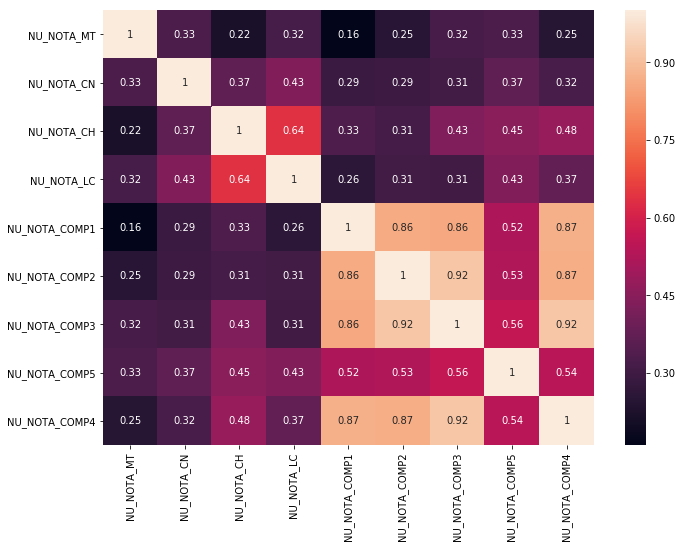

In [313]:
corr = data[features].corr()
ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

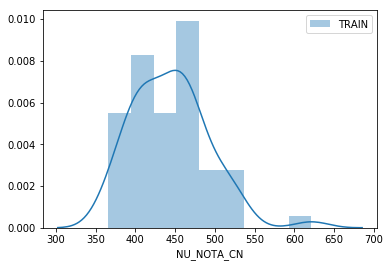

In [314]:
CN = data['NU_NOTA_CN'].fillna(0)
sns.distplot(CN)
plt.legend(labels=['TRAIN'], ncol=2, loc='upper right');

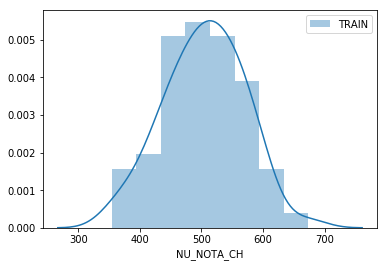

In [315]:
CH = data['NU_NOTA_CH'].fillna(0)

sns.distplot(CH)
plt.legend(labels=['TRAIN'], ncol=2, loc='upper right');

In [316]:
train = data[features].drop(['NU_NOTA_MT'],axis =1)

In [317]:
target = data['NU_NOTA_MT']
target

198      500.7
236      504.4
1098     375.8
1361     473.7
1381     416.5
1397     404.6
1569     392.0
1823     430.9
2045     357.1
2387     490.3
2567     390.5
2889     368.6
3004     422.9
3082     577.1
3416     475.9
3496     551.0
3884     389.3
3885     675.0
3928     413.5
5119     488.6
5201     416.6
5484     389.0
5740     493.2
5897     419.9
6023     436.3
6109     567.7
6174     377.1
6360     356.1
6378     448.9
6403     471.9
         ...  
7294     460.0
7348     482.7
7578     573.0
7579     474.1
7712     412.3
7739     489.4
8078     541.9
8440     535.4
8813     503.7
8871     449.6
8916     387.0
8991     385.9
9389     397.5
9538     403.4
9665     384.2
9844     386.3
10047    353.1
10582    394.3
10912    456.1
10942    719.5
11407    432.3
11444    467.2
12073    404.1
12289    386.0
12299    490.7
12487    370.5
12621    456.3
12672    484.0
13522    531.6
13540    379.7
Name: NU_NOTA_MT, Length: 64, dtype: float64

In [318]:
scaler = preprocessing.StandardScaler().fit(train)


In [319]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor( 
           criterion='mae', 
           max_depth=20,
           max_leaf_nodes=None,
           min_impurity_split=None,
           min_samples_leaf=1,
           min_samples_split=2,
           min_weight_fraction_leaf=0.0,
           n_estimators= 700,
           n_jobs=-1,
           random_state=0,
           verbose=0,
           warm_start=False
)

In [320]:
regressor.fit(train, target)


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [321]:
y_pred = regressor.predict(train)


In [322]:
ypred


array(['474.9647857142899', '482.7642857142872', '403.2933571428542',
       '460.3881428571467', '417.79000000000076', '415.311000000001',
       '416.7031428571431', '433.0850714285708', '395.8807142857168',
       '471.4636428571394', '409.3481428571431', '395.5837857142875',
       '430.83871428571416', '511.3412857142837', '500.522285714288',
       '515.9059285714288', '420.8524285714253', '602.3515714285716',
       '421.77814285714305', '469.57142857142884', '438.559214285715',
       '403.46999999999974', '467.1001428571463', '418.90828571428364',
       '433.1762142857112', '538.2499285714335', '405.10928571428707',
       '385.5240000000025', '436.4174285714287', '465.0899285714298',
       '466.5169285714276', '440.8541428571388', '433.46514285714557',
       '392.8814285714264', '516.3241428571431', '470.91728571428877',
       '561.0631428571428', '465.7949999999984', '425.22542857142537',
       '471.89385714285805', '513.0870000000023', '493.7530000000015',
       '482.

In [323]:
NU_INSCRICAO = data['NU_INSCRICAO'].values
final = pd.DataFrame(list(zip(NU_INSCRICAO, y_pred)), columns = ['NU_INSCRICAO', 'NU_NOTA_MT'])

In [324]:
final

,NU_INSCRICAO,NU_NOTA_MT
0,c766dba145ea799e135e91fbfbd0d6bbbc9efb2f,474.964786
1,a79131b85ffd8fdb7990836680caf5ef1b1bc137,482.764286
2,0c2c28d8ecfa548da62807fb409c11cef1942098,403.293357
3,65d009c286d9ee27d3dc585bd4fe8b91a0ffffba,460.388143
4,57c4cd599e30b46d56b43459acda8e436e4f7978,417.790000
5,5844caf7cd2fda07b4e939521d661264b2e22c14,415.311000
6,99a907f0da5a7d661e80379974329524a36dd440,416.703143
7,f57fafb2677b7d283e37dfc7aabd9fcb2f13a447,433.085071
8,857869202cb3effc59f484a76deac21676190c70,395.880714
9,e30705334fe6cda4587da63fea77f968ac4a3663,471.463643


In [325]:
target

198      500.7
236      504.4
1098     375.8
1361     473.7
1381     416.5
1397     404.6
1569     392.0
1823     430.9
2045     357.1
2387     490.3
2567     390.5
2889     368.6
3004     422.9
3082     577.1
3416     475.9
3496     551.0
3884     389.3
3885     675.0
3928     413.5
5119     488.6
5201     416.6
5484     389.0
5740     493.2
5897     419.9
6023     436.3
6109     567.7
6174     377.1
6360     356.1
6378     448.9
6403     471.9
         ...  
7294     460.0
7348     482.7
7578     573.0
7579     474.1
7712     412.3
7739     489.4
8078     541.9
8440     535.4
8813     503.7
8871     449.6
8916     387.0
8991     385.9
9389     397.5
9538     403.4
9665     384.2
9844     386.3
10047    353.1
10582    394.3
10912    456.1
10942    719.5
11407    432.3
11444    467.2
12073    404.1
12289    386.0
12299    490.7
12487    370.5
12621    456.3
12672    484.0
13522    531.6
13540    379.7
Name: NU_NOTA_MT, Length: 64, dtype: float64

In [326]:
final.to_csv('answer.csv', sep=',')